In [145]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [146]:
#loading training data file
train_data=pd.read_excel(r'C:\Users\Csp\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')

#display top of dataset
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [147]:
#loading testing data file
test_data=pd.read_excel(r'C:\Users\Csp\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx')

#display top of dataset
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [148]:
### Merging both train and test file to a single one using pd.concat, perform feature engineering 
###and then again dividing them later

## Creating a new Dataframe 'data ' with an extra variable 'root' specifying where each observation belong

train_data['root']='train'
test_data['root']= 'test'

#merging both train and test

data=pd.concat([train_data,test_data],ignore_index=True, sort=False)

#displaying top of dataset
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,root
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [149]:
print('The Train Data has ', train_data.shape[0], 'rows and ', train_data.shape[1], 'columns\n')
print('The Train Data has ', test_data.shape[0], 'rows and ', test_data.shape[1], 'columns\n')
print('The Train Data has ', data.shape[0], 'rows and ', data.shape[1], 'columns\n')

The Train Data has  5961 rows and  8 columns

The Train Data has  1987 rows and  7 columns

The Train Data has  7948 rows and  8 columns



In [150]:
data.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
root                   object
dtype: object

In [151]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
root                     0
dtype: int64

In [152]:
print('No. of Unique values in each attribute------')
data.apply(lambda x: len(x.unique()))

No. of Unique values in each attribute------


Qualification         1801
Experience              64
Rating                  53
Place                  949
Profile                  6
Miscellaneous_Info    3981
Fees                    41
root                     2
dtype: int64

In [153]:
### Converting experience and rating from object to int type.

## Experience
data['Experience']=data['Experience'].str.split().str[0]
data['Experience'] = data['Experience'].astype(int)




In [154]:
## Before converting rating to integer type, first we need to handle missing values.
## AS we cannot convert float Nan to integer . So first replacing Nan values with 0 for time being.

data['Rating'].fillna('0%',inplace=True)

##Rating
data['Rating']=data['Rating'].str.slice(stop=-1).astype(int)

## replacing 0 back with Nan value

data['Rating'] = data['Rating'].replace(0, np.nan)

In [155]:
## Now, if we look on to place attribute, it consist of area and city separated by dilimiter ",".
# We can make two new attributes from 'place' attribute. One with Area/locality and other with City.

data['Area/Locality']=data['Place'].str.split(',').str[0]
data['City']=data['Place'].str.split(',').str[1]


In [156]:
## Now we can drop attribute 'place' and 'Miscellaneous_Info'

data.drop(['Place','Miscellaneous_Info'],axis=1,inplace=True)

In [157]:
#### Now let's focus on attribute 'Qualification' and 'Profile'.
### Profile has 6 unique nos..
## And profile is also present in qualification.


#Let's check for uniqu evalues of Profile

data['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [158]:
### Building two new attributes from Qualification : Education and Specialization

data['Education']=data['Qualification'].str.split('-').str[0]
data['Specialization']=data['Qualification'].str.split('-').str[1]


## Dropping Qualification
data.drop(['Qualification'],axis=1,inplace=True)

In [159]:
#Let's check for dataset after cleaning---->

data.head()

,Experience,Rating,Profile,Fees,root,Area/Locality,City,Education,Specialization
0,24,100.0,Homeopath,100.0,train,Kakkanad,Ernakulam,"BHMS, MD",Homeopathy
1,12,98.0,Ayurveda,350.0,train,Whitefield,Bangalore,"BAMS, MD",Ayurveda Medicine
2,9,NaN,ENT Specialist,300.0,train,Mathikere - BEL,Bangalore,"MBBS, MS",Otorhinolaryngology
3,12,NaN,Ayurveda,250.0,train,Bannerghatta Road,Bangalore,BSc,"Zoology, BAMS"
4,20,100.0,Ayurveda,250.0,train,Keelkattalai,Chennai,BAMS,NaN


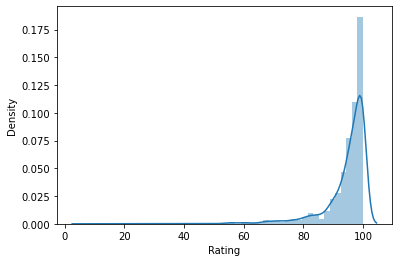

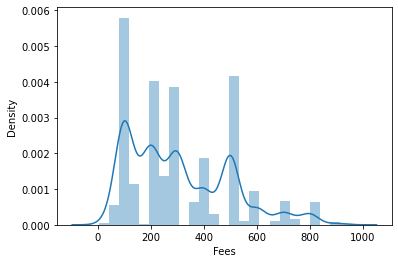

<Figure size 432x288 with 0 Axes>

In [160]:
### dealing with null values
##Rating and fees is float type data. So replacing with either mean or median.
#Checking for distibution plot for Rating and fees.

cols=('Rating','Fees')
for i in cols:
    sns.distplot(data[i])
    plt.figure()

In [161]:
data['Rating']=data['Rating'].fillna(data['Rating'].median())
data['Fees']=data['Fees'].fillna(data['Fees'].mean())

data['Area/Locality']=data['Area/Locality'].fillna(data['Area/Locality'].mode()[0])
data['City']=data['City'].fillna(data['City'].mode()[0])
data['Specialization']=data['Specialization'].fillna(data['Specialization'].mode()[0])

In [162]:
data['City'].value_counts()

 Bangalore             1710
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
 Sector 5                 1
Name: City, dtype: int64

In [163]:
data['City']=data['City'].str.replace('Sector 5','Bangalore')

In [164]:
data['City'].value_counts()

 Bangalore             1711
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
Name: City, dtype: int64

In [165]:
## After data cleaning, again checking for null values in the data set
data.isnull().sum()

Experience        0
Rating            0
Profile           0
Fees              0
root              0
Area/Locality     0
City              0
Education         0
Specialization    0
dtype: int64

In [166]:
## Checking for unique values in the processed dataset
print('No. of Unique values in processed dataset------')
data.apply(lambda x: len(x.unique()))

No. of Unique values in processed dataset------


Experience         64
Rating             52
Profile             6
Fees               41
root                2
Area/Locality     937
City                8
Education         810
Specialization    873
dtype: int64

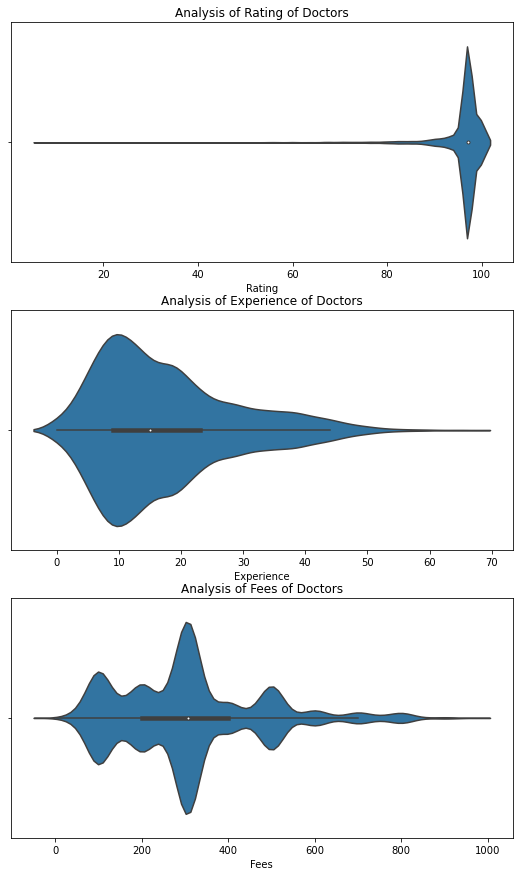

In [167]:
### Exploratory data analysis
#3 Univariate analysis of attributes 'Rating','Fees','Experience'
plt.figure(figsize=(9,15))

plt.subplot(311)
sns.violinplot(x='Rating',data=data)
plt.title('Analysis of Rating of Doctors')


plt.subplot(312)
sns.violinplot(x='Experience',data=data)
plt.title('Analysis of Experience of Doctors') 

plt.subplot(313)
sns.violinplot(x='Fees',data=data)
plt.title('Analysis of Fees of Doctors')  

plt.show()

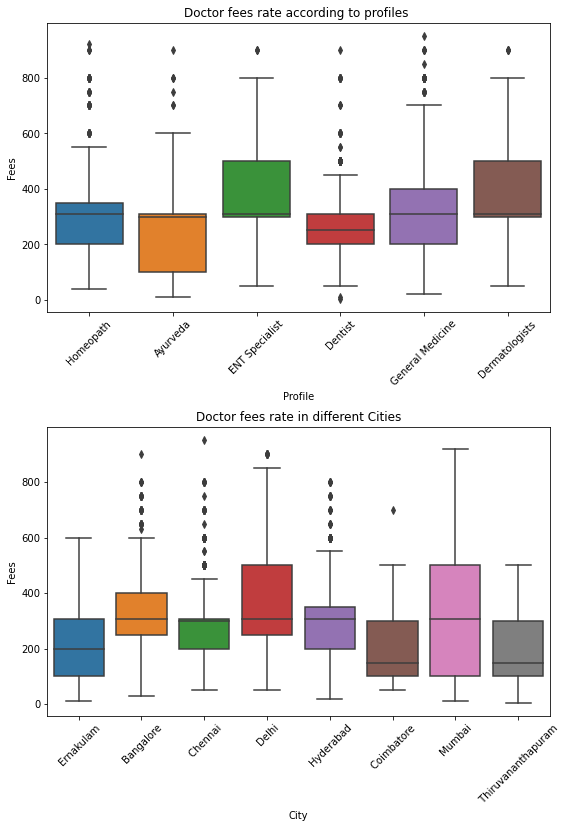

In [168]:
## Analysis of target variable with other attributes.
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.boxplot(x='Profile',y='Fees',data=data)
plt.title('Doctor fees rate according to profiles ')
plt.xticks(rotation=45)

plt.subplot(212)
sns.boxplot(x='City',y='Fees',data=data)
plt.title('Doctor fees rate in different Cities')
plt.xticks(rotation=45)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Experience'>

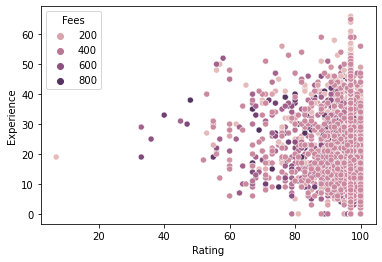

In [169]:
sns.scatterplot(x='Rating',y='Experience',data=data,hue='Fees')


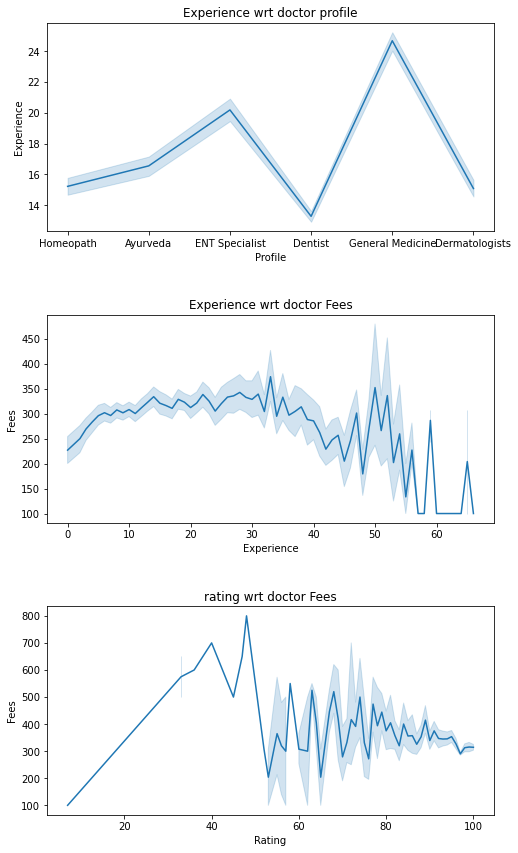

In [170]:
plt.figure(figsize=(8,8))

plt.subplot(311)
sns.lineplot(y='Experience',x='Profile',data=data)
plt.title("Experience wrt doctor profile")

plt.subplot(312)
ax = sns.lineplot(x='Experience',y='Fees',data=data,markers=True, dashes=False)
plt.title("Experience wrt doctor Fees")

plt.subplot(313)
ax = sns.lineplot(x='Rating',y='Fees',data=data,markers=True, dashes=False)
plt.title("rating wrt doctor Fees")


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show()

In [171]:
data.dtypes

Experience          int32
Rating            float64
Profile            object
Fees              float64
root               object
Area/Locality      object
City               object
Education          object
Specialization     object
dtype: object

In [172]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

#applying label encoding to convert object type data to int type.
LE=LabelEncoder()
cols=['Profile','Area/Locality','City','Education','Specialization']
for i in cols:
    data[i]=LE.fit_transform(data[i])

In [173]:
## Checking for data types after applying encoding

data.dtypes

Experience          int32
Rating            float64
Profile             int32
Fees              float64
root               object
Area/Locality       int32
City                int32
Education           int32
Specialization      int32
dtype: object

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

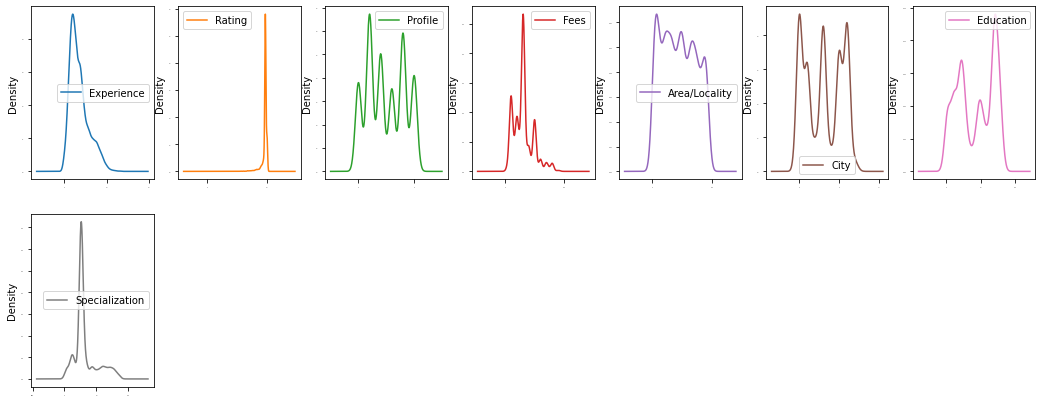

In [174]:
# Density visualisation for all attributes

data.plot(kind='density',layout=(2,7),sharex=False,sharey=False,subplots=True,grid=False,fontsize=1,figsize=(18,7))

In [175]:
##Checking for correlation of output variable with other attributes:
corr_matrix=data.corr()

<AxesSubplot:>

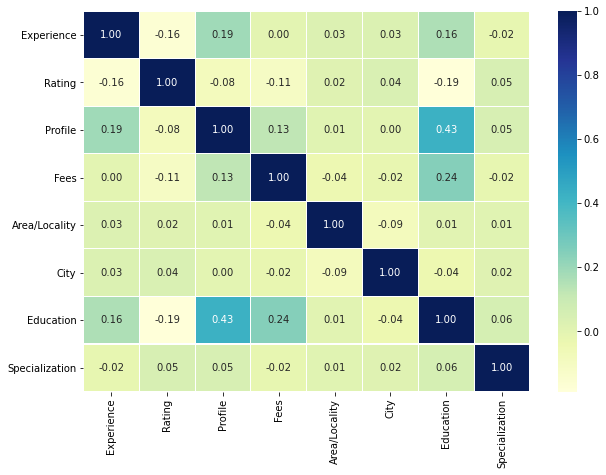

In [176]:
#Graphical Visualization of correlation 
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,annot=True,linecolor='white',fmt='.2f',linewidths=0.1,cmap="YlGnBu")

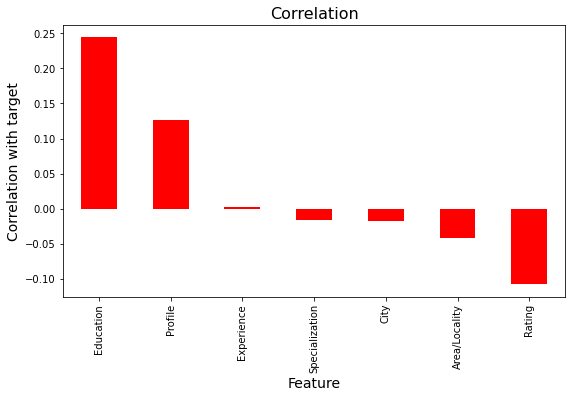

In [177]:
plt.figure(figsize=(9,5))
z=corr_matrix['Fees'].sort_values(ascending=False)
z.drop(['Fees']).plot(kind='bar',color='r')

plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with target',fontsize=14)
plt.title('Correlation',fontsize=16)
plt.show()

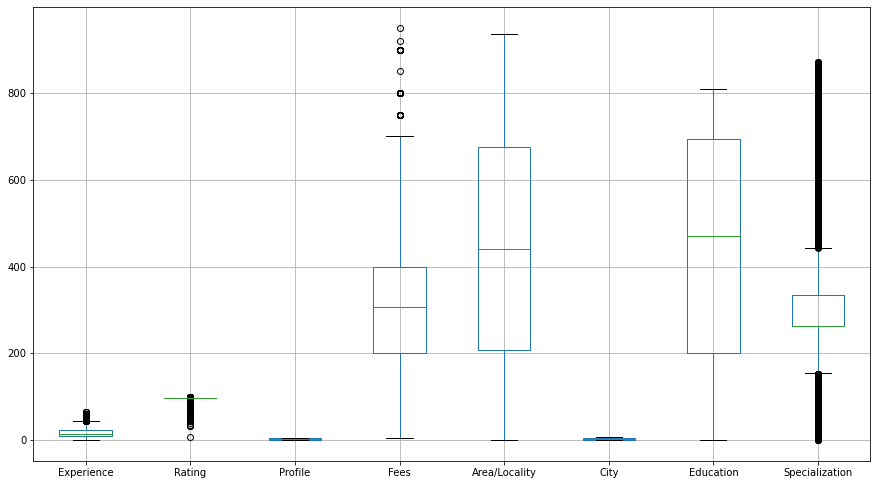

In [178]:
###checking for outliers

data.boxplot(figsize=[15,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [179]:
from numpy import percentile
data_new=data
data_new.shape
att_=att_ = ['Rating','Fees','Specialization']
array=[None]*len(att_)
for x,i in enumerate(att_):
    q25,q75=percentile(data[i],25),percentile(data[i],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=q25-cut_off,q75+cut_off
    array[x]=[i,lower,upper]
    data_new[i]=data_new[i].apply(lambda x: lower if x<lower else (upper if x>upper else x))

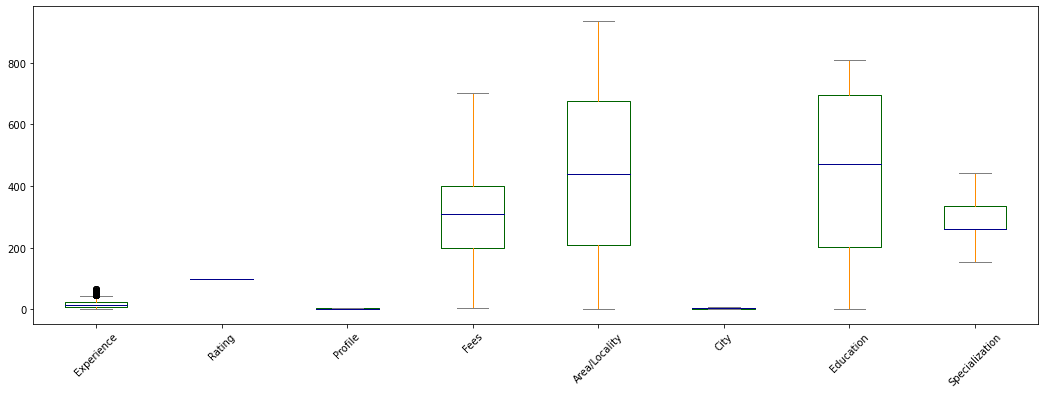

In [180]:
#Checking for Outliers after removing outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data_new.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [181]:
## Checking for skewness

data_new.skew()

Experience        0.984224
Rating            0.000000
Profile           0.088789
Fees              0.643764
Area/Locality     0.105132
City              0.002971
Education        -0.117712
Specialization    0.481002
dtype: float64

In [182]:
## removing skewness for attributes having gretaer than +/-0.5 value

skew_data=('Experience','Fees')

for data in skew_data:
    data_new[data]=np.sqrt(data_new[data])

In [183]:
data_new.skew()

Experience        0.073710
Rating            0.000000
Profile           0.088789
Fees              0.025227
Area/Locality     0.105132
City              0.002971
Education        -0.117712
Specialization    0.481002
dtype: float64

In [184]:
#encode city and profile
new_data = pd.get_dummies(data_new, columns=['City','Profile'], prefix=['City','Profile'])

In [185]:
## Splitting training and testing model

#Divide into test and train:
train = new_data.loc[new_data['root']=="train"]
test = new_data.loc[new_data['root']=="test"]

#Drop unnecessary columns:
test.drop(['Fees','root'],axis=1,inplace=True)
train.drop(['root'],axis=1,inplace=True)

In [186]:
x=train.drop(['Fees','Area/Locality'],axis=1) 
y=train['Fees']

In [187]:
print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (5961, 18)
Shape of y: (5961,)


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [189]:
#Finding out best random state

from sklearn.linear_model import  LinearRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is : ',maxAccu,'on random state :' ,maxRS)

Best Accuracy is :  0.1877665990394246 on random state : 15


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=15)

In [191]:
models = [['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()],
               ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
               ['SVM :', SVR()],
               ['AdaBoostClassifier :', AdaBoostRegressor()],
               ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
               ['Xgboost: ', XGBRegressor()],
               ['Lasso: ', Lasso()],
               ['Ridge: ', Ridge(random_state=6)],
               ['BayesianRidge: ', BayesianRidge()],
               ['ElasticNet: ', ElasticNet()],
               ['HuberRegressor: ', HuberRegressor()]]

In [192]:
print("Mean Square Errors---->")
print('\n')

for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Mean Square Errors---->


DecisionTree : 6.439873633243459
RandomForest : 5.300989979761852
KNeighbours : 5.862687772645454
SVM : 4.975075341686876
AdaBoostClassifier : 4.856478883450285
GradientBoostingRegressor:  4.627916597846865
Xgboost:  5.065337082174186
Lasso:  4.987270901295775
Ridge:  4.737422213015526
BayesianRidge:  4.739100869864194
ElasticNet:  4.986969903208697
HuberRegressor:  4.7642607585592245


In [193]:
print("r2 Square/Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (r2_score(y_test, predictions))*100)

r2 Square/Accuracy Score----->


DecisionTree : -48.62844787550977
RandomForest : -1.2719072002310927
KNeighbours : -24.396886405513317
SVM : 10.419124440080818
AdaBoostClassifier : 14.34191445112576
GradientBoostingRegressor:  22.50410064003534
Xgboost:  7.139144142818033
Lasso:  9.979401276551059
Ridge:  18.773046853169607
BayesianRidge:  18.715472783322774
ElasticNet:  9.990267022921294
HuberRegressor:  17.850102554765545


In [194]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x,y,cv=5,scoring='r2')
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean(),result.std())
    print(result)

Cross_val_scores:


DecisionTree : : -0.440464 (0.037017)
RandomForest : : 0.020924 (0.031175)
KNeighbours : : -0.182144 (0.045963)
SVM : : 0.069072 (0.015500)
AdaBoostClassifier : : 0.135212 (0.009438)
GradientBoostingRegressor:  : 0.199871 (0.008244)
Xgboost:  : 0.102869 (0.027203)
Lasso:  : 0.075014 (0.008907)
Ridge:  : 0.151033 (0.008768)
BayesianRidge:  : 0.151008 (0.009084)
ElasticNet:  : 0.075018 (0.009009)
HuberRegressor:  : 0.134567 (0.016875)


In [195]:
#Gradient Boosting regressor
##importing library
from sklearn.model_selection import GridSearchCV

ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300]}

#Create new GBR object
gbr_2 = GradientBoostingRegressor()

#Use GridSearch
GCV = GridSearchCV(gbr_2, ex_param_grid, cv=5, scoring='r2')

#Fit the model
best_model = GCV.fit(x,y)

#checking for best parameters
GCV.best_params_

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'n_estimators': 100}

In [196]:
#Creating Final Model after hyperparameter tuning for Gradient Boosting regressor

#Creating Final Model after hyperparameter tuning for Gradient Boosting regressor

f_mod= GradientBoostingRegressor(max_depth=None,max_features=1,min_samples_split=3,
                                min_samples_leaf=10,n_estimators=100)


f_mod.fit(x,y)

y_pred = f_mod.predict(x_test)

print('root mean squared error for Gradient Boosting regressor:',np.sqrt(mean_squared_error(y_test,y_pred)))

print('Model accuracy for Gradient Boosting regressor: ',r2_score(y_test, y_pred))

root mean squared error for Gradient Boosting regressor: 3.7397273045826327
Model accuracy for Gradient Boosting regressor:  0.49383064357356043


In [197]:
from joblib import dump, load
dump(f_mod, 'doctors_fees_gbr.joblib') 

['doctors_fees_gbr.joblib']